## 1.Build a Simple predictive Model using Simple Linear regression

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

data = {
    'Years of Experience': [1,2,3,4,5],
    'Salary': [32000.0,37000.0,42400.0,48200.0,60000.0]  
}

df = pd.DataFrame(data)
df

,Years of Experience,Salary
0,1,32000.0
1,2,37000.0
2,3,42400.0
3,4,48200.0
4,5,60000.0


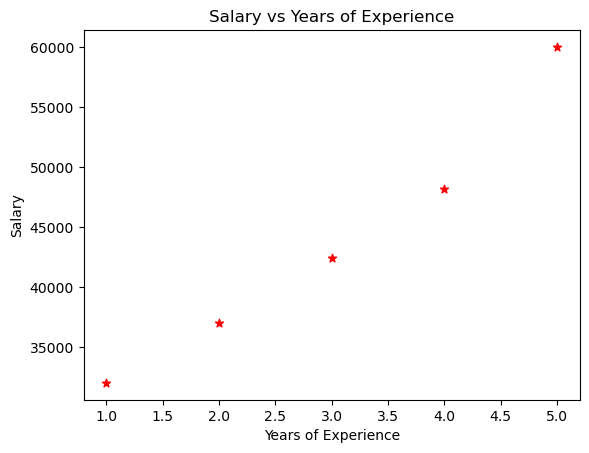

In [67]:
plt.scatter(df['Years of Experience'], df['Salary'],marker="*",c="red")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.show()


In [70]:
model = linear_model.LinearRegression()
model.fit(df[['Years of Experience']], df['Salary'])
predictions = model.predict(df[['Years of Experience']])
print("Predictions:", predictions)

Predictions: [30480. 37200. 43920. 50640. 57360.]


In [90]:
new_years_of_experience = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
new_years_of_experience_array = np.array(new_years_of_experience).reshape(-1, 1)
predicted_salaries = model.predict(new_years_of_experience_array)
predicted_salaries

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 30480.,  37200.,  43920.,  50640.,  57360.,  64080.,  70800.,
        77520.,  84240.,  90960.,  97680., 104400., 111120., 117840.,
       124560., 131280., 138000., 144720., 151440.])

In [91]:
New_data = pd.DataFrame(
    {
        "Years of Experiance":new_years_of_experience,
        "Salry":predicted_salaries
    }
)
New_data

,Years of Experiance,Salry
0,1,30480.0
1,2,37200.0
2,3,43920.0
3,4,50640.0
4,5,57360.0
5,6,64080.0
6,7,70800.0
7,8,77520.0
8,9,84240.0
9,10,90960.0


# 6 Build a Classification Model using Navie Byes algorithm

In [94]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
np.random.seed(42)

n_samples = 1000
X1 = np.random.normal(loc=0, scale=1, size=n_samples)
X2 = np.random.normal(loc=1, scale=2, size=n_samples)
data = pd.DataFrame({'Feature 1': X1, 'Feature 2': X2})
data

,Feature 1,Feature 2
0,0.496714,3.798711
1,-0.138264,2.849267
2,0.647689,1.119261
3,1.523030,-0.293874
4,-0.234153,2.396447
...,...,...
995,-0.281100,3.140300
996,1.797687,0.946957
997,0.640843,-0.763749
998,-0.571179,0.673866


In [96]:
threshold = 0.5  # Threshold for binary classification
data['Target'] = (2*X1 - 3*X2 + np.random.normal(loc=0, scale=1, size=n_samples)) > threshold

# Convert boolean target to 0s and 1s
data['Target'] = data['Target'].astype(int)
X = data[['Feature 1', 'Feature 2']]
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)  # mode training
y_pred = model.predict(X_test)

In [97]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.925

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       142
           1       0.94      0.79      0.86        58

    accuracy                           0.93       200
   macro avg       0.93      0.89      0.90       200
weighted avg       0.93      0.93      0.92       200


Confusion Matrix:
[[139   3]
 [ 12  46]]


# 3.Create L1 Regularisation using Lasso Regression Model

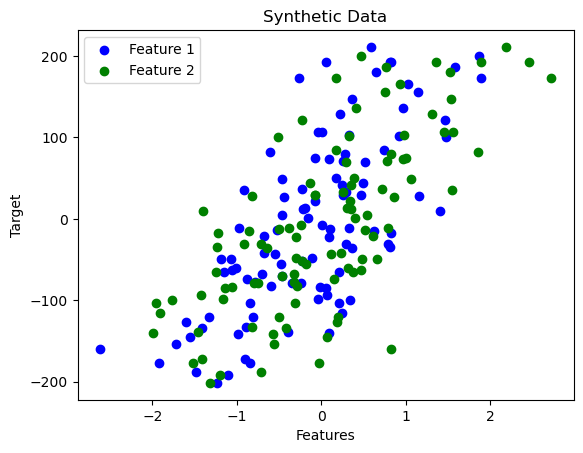

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(X[:,0], y, color='blue', label='Feature 1')
plt.scatter(X[:,1], y, color='green', label='Feature 2')
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Synthetic Data')
plt.legend()
plt.show()


Mean Squared Error: 154.81742190073786


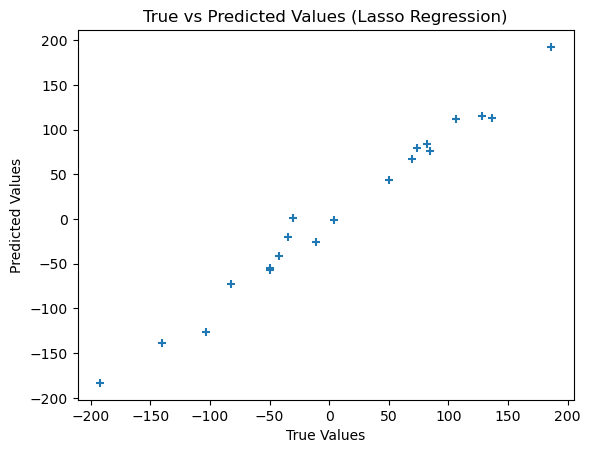

Coefficients: [86.18546664 73.57152529]


In [112]:
lasso = Lasso(alpha=0.1) 
lasso.fit(X_train, y_train) # model training

coefficients = lasso.coef_

y_pred = lasso.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the true vs predicted values
plt.scatter(y_test, y_pred,marker="+")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values (Lasso Regression)")
plt.show()

# Print the coefficients
print("Coefficients:", coefficients)


# 4.Create L2 Regularisation using Ridge Regression Model

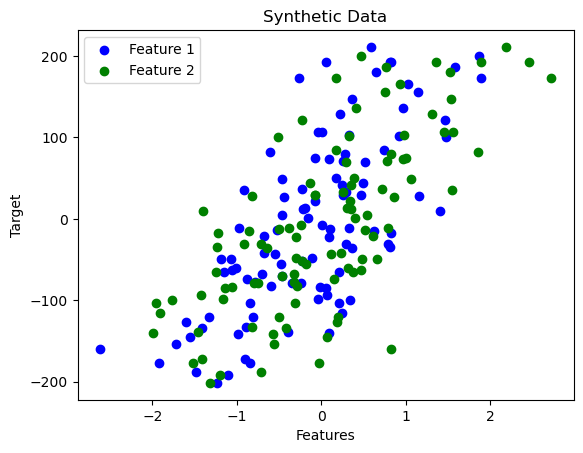

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


plt.scatter(X[:,0], y, color='blue', label='Feature 1')
plt.scatter(X[:,1], y, color='green', label='Feature 2')
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Synthetic Data')
plt.legend()
plt.show()


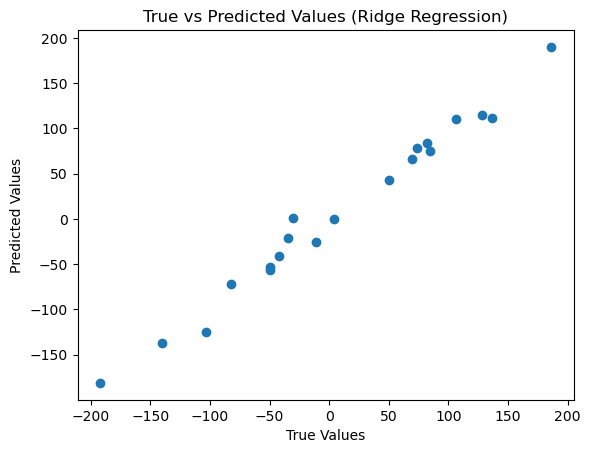

Coefficients: [84.97342091 72.791857  ]
Mean Squared Error: 157.4693197263409


In [103]:
ridge = Ridge(alpha=1.0) 
ridge.fit(X_train, y_train)
coefficients = ridge.coef_

y_pred = ridge.predict(X_test)  # Make predictions on the testing data

mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error

plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values (Ridge Regression)")
plt.show()

print("Coefficients:", coefficients)
print("Mean Squared Error:", mse)

# 5.Build a Classification Model Using Logistic regression

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logistic_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:")
print(class_report)


Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 7.Build a classification Model using K-Nearest neighbour algorithm

In [116]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a synthetic dataset
np.random.seed(42)
X1 = np.random.normal(loc=0, scale=1, size=(100, 2))  # Class 0
X2 = np.random.normal(loc=3, scale=1, size=(100, 2))  # Class 1
X = np.vstack((X1, X2))
y = np.array([0] * 100 + [1] * 100)

# Create a DataFrame
data = pd.DataFrame(data=np.concatenate((X, y.reshape(-1, 1)), axis=1),
                    columns=['Feature 1', 'Feature 2', 'Label'])


In [117]:

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
k = 5  
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_scaled, y_train)

y_pred = knn_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Additional evaluation metrics
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



# 8.Build a Classification Model using Decision Tree Algorithm

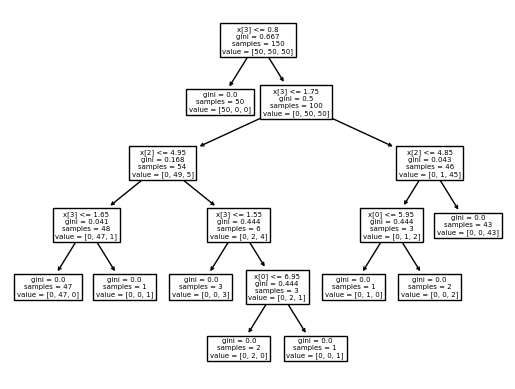

In [121]:
import pandas as  pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn import tree 
from sklearn.datasets import load_iris

iris = load_iris()
X,y = iris.data,iris.target
decision_tree = tree.DecisionTreeClassifier()
cli = decision_tree.fit(X,y)
tree.plot_tree(cli)
plt.show()

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Additional evaluation metrics
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 9.Build a Ensemble Learning Model using random Forest Algorithm

In [125]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

np.random.seed(42)
X1 = np.random.normal(loc=0, scale=1, size=(100, 2))  # Class 0
X2 = np.random.normal(loc=3, scale=1, size=(100, 2))  # Class 1
X = np.vstack((X1, X2))
y = np.array([0] * 100 + [1] * 100)

data = pd.DataFrame(data=np.concatenate((X, y.reshape(-1, 1)), axis=1),
                    columns=['Feature 1', 'Feature 2', 'Label'])

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Additional evaluation metrics
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



# 10.Build a Linear Discriminant Analysis (LDA) Model (Unsupervised)

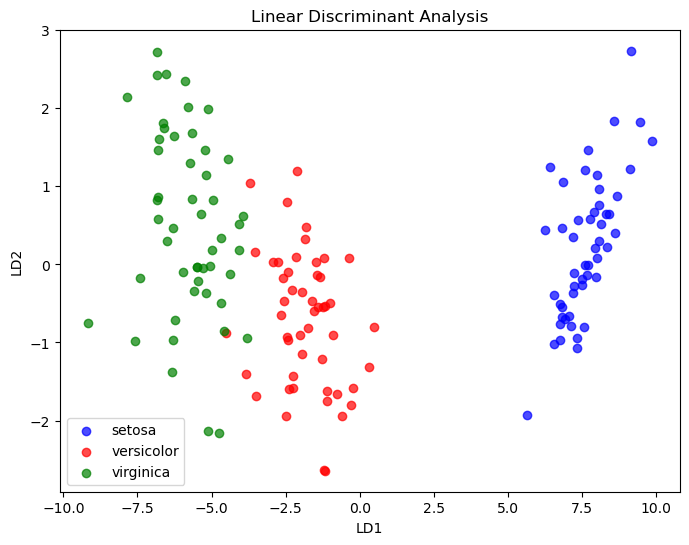

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

# Perform Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)  # We reduce the data to 2 dimensions for visualization
X_lda = lda.fit_transform(X, y)

# Visualize the transformed data
plt.figure(figsize=(8, 6))

for label, color in zip(range(3), ['blue', 'red', 'green']):
    plt.scatter(X_lda[y == label, 0],
                X_lda[y == label, 1],
                color=color,
                label=iris.target_names[label],
                alpha=0.7)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('Linear Discriminant Analysis')
plt.legend(loc='best')
plt.show()

# 11.Build Kmeans Clustering model (Unsupervised)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


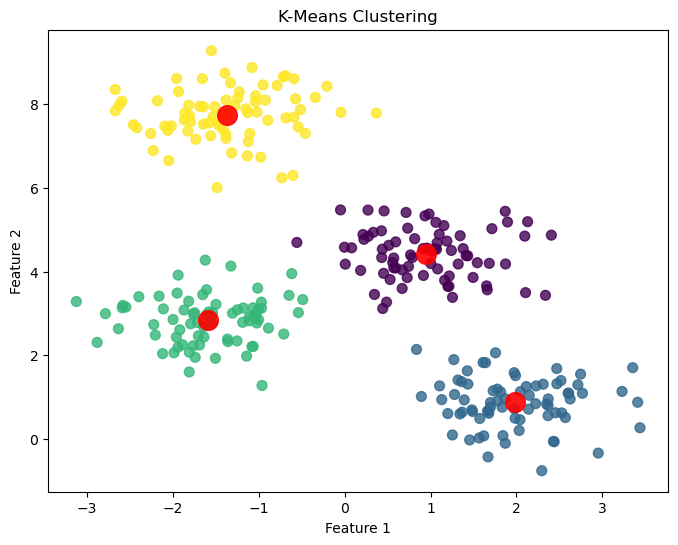

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=4)  # Build the K-Means clustering model
kmeans.fit(X)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.8)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.9)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# 2.Build a Multiple Predictive Model using Multiple Linear regression (real Estate price prediction)

In [136]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a synthetic dataset for real estate price prediction
np.random.seed(42)
n_samples = 1000

# Features: Size of the house (in square feet), Number of bedrooms, Distance to city center (in miles)
size = np.random.normal(loc=2000, scale=500, size=n_samples)
bedrooms = np.random.randint(1, 6, size=n_samples)
distance_to_center = np.random.normal(loc=10, scale=5, size=n_samples)

# Target: House price (in thousands of dollars)
price = 100*size + 50*bedrooms - 20*distance_to_center + np.random.normal(loc=0, scale=10000, size=n_samples)

# Create a DataFrame
data = pd.DataFrame({'Size': size, 'Bedrooms': bedrooms, 'Distance_to_Center': distance_to_center, 'Price': price})

# Split the dataset into train and test sets
X = data[['Size', 'Bedrooms', 'Distance_to_Center']]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2:", train_r2)
print("Test R^2:", test_r2)


Train RMSE: 9722.655518942136
Test RMSE: 9535.797218024845
Train R^2: 0.9626297038602425
Test R^2: 0.9628590995616916
